![Header](../images/header.png)

<p align="center"><img src="https://www.ge.com/renewableenergy/sites/default/files/2020-01/onshore-hero5.jpg"/></p>

<h1 align="center">ARIMA - Modell</h1>

In [1]:
import pandas as pd
import numpy as np

#### Please fill in the path to the preprocessed data.

In [2]:
pre_path = "../data/preprocessed/measurement_windio_msb-0002-a_2021-10-21.csv"

#### The following cell shows your preprocessed input data. It gets resampled secundary.

In [8]:
df = pd.read_csv(pre_path, parse_dates=["date_time"], index_col="date_time")
df = df.resample("200ms").mean()
df.head()
df.describe()

,uptime,acc_x,acc_y,acc_z,rot_x,rot_y,rot_z,mag_x,mag_y,mag_z,temp
count,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000
mean,55898.501877,-0.033157,-0.020897,0.977297,0.971913,0.676640,-0.752992,-295.107508,35.562652,-287.568137,2438.232475
std,1073.657470,0.009063,0.008899,0.001313,0.045155,0.041297,1.997344,106.835008,2.455625,141.477455,262.180813
min,54005.450000,-0.058567,-0.042440,0.960815,0.644614,0.434266,-1.085666,-345.800000,14.300000,-368.700000,2023.111111
25%,54969.243250,-0.036031,-0.022237,0.976630,0.941985,0.650382,-0.809160,-298.400000,34.000000,-294.700000,2198.400000
50%,55898.706833,-0.033301,-0.021016,0.977268,0.972935,0.678541,-0.788804,-297.000000,35.333333,-292.200000,2407.111111
75%,56828.148500,-0.030609,-0.019836,0.977912,1.003053,0.703986,-0.767939,-295.555556,36.800000,-289.100000,2670.509091
max,57757.530000,0.418226,0.426880,0.999864,1.175573,0.923664,110.413910,6985.222222,58.500000,6991.555556,2924.444444


#### Removes the columns that are not needed.

In [4]:
df.drop(['uptime', 'mag_x', 'mag_y', 'mag_z', 'temp'], axis=1, inplace=True)
df.dropna(inplace = True)
df.head()

,acc_x,acc_y,acc_z,rot_x,rot_y,rot_z
date_time,,,,,,
2021-10-21 09:42:23.600,-0.029083,-0.023666,0.979401,0.923664,0.751908,-0.801527
2021-10-21 09:42:23.800,-0.029639,-0.022314,0.978235,0.946565,0.668702,-0.815267
2021-10-21 09:42:24.000,-0.034192,-0.023615,0.977338,0.919084,0.662595,-0.836641
2021-10-21 09:42:24.200,-0.034254,-0.023797,0.976922,0.917727,0.707379,-0.822731
2021-10-21 09:42:24.400,-0.032990,-0.019678,0.977393,0.937405,0.661069,-0.813740


<AxesSubplot:xlabel='date_time'>

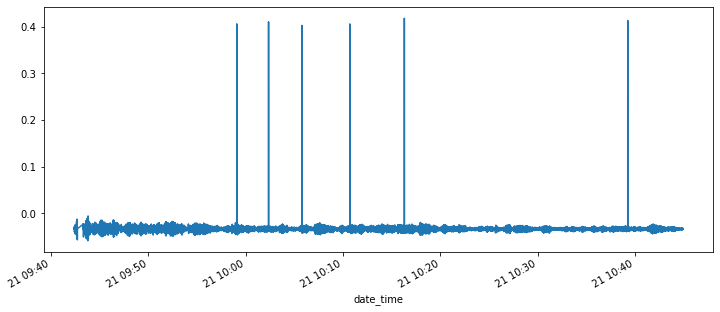

In [5]:
df["acc_x"].plot(figsize=(12,5))

In [6]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = "AIC")
    print("1. ADF: ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of Lags: ", dftest[2])
    print("4. Num of Observation Used for ADF Regression and critical values calculated: ", dftest[3])
    print("5. Critical Values: ", dftest[4])
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
    
ad_test(df["rot_x"])
    

1. ADF:  -4.023050976963187
2. P-Value :  0.001294504708392746
3. Num of Lags:  42
4. Num of Observation Used for ADF Regression and critical values calculated:  18547
5. Critical Values:  {'1%': -3.430702628742273, '5%': -2.861695848838157, '10%': -2.5668529541949137}
	 1% :  -3.430702628742273
	 5% :  -2.861695848838157
	 10% :  -2.5668529541949137


,acc_x,acc_y,acc_z,rot_x,rot_y,rot_z
date_time,,,,,,
2021-10-21 09:42:23.600,-0.029083,-0.023666,0.979401,0.923664,0.751908,-0.801527
2021-10-21 09:42:23.800,-0.029639,-0.022314,0.978235,0.946565,0.668702,-0.815267
2021-10-21 09:42:24.000,-0.034192,-0.023615,0.977338,0.919084,0.662595,-0.836641
2021-10-21 09:42:24.200,-0.034254,-0.023797,0.976922,0.917727,0.707379,-0.822731
2021-10-21 09:42:24.400,-0.032990,-0.019678,0.977393,0.937405,0.661069,-0.813740
